In [7]:
%reload_ext autoreload
%autoreload 2
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pyarrow.parquet as pq
from PqiDataSdk import *    

from utils.nn_pred_func import get_nn_pred
from utils.xgb_pred_func import get_xgb_pred
from utils.eval_funcs import *

ds = PqiDataSdk(user='yzhou')

In [2]:

# 结果存储路径
save_path = ''

# 数据路径
data_path = '/data/local_data/shared/102/intern_data_yzhou/zy4_parquet'

# 起止时间
start_date = '20200601'
end_date = '20210331'

stacking_type = 'rank'
transfea = None # x2fea | fea2x | None

In [6]:
# 模型路径
# onnx_save_path = '/mnt/beegfs/strategy_intern/zzdai_intern/for_wpxu/nn_models/mlp_wpxu_0702_yrank1d2d3d_fea469_17012005_5min'
model_path = '/mnt/beegfs/strategy_intern/zzdai_intern/for_wpxu/nn_models/mlp_wpxu_0702_yrank1d2d3d_fea469_17012005_5min'


df_pred_all = get_nn_pred(data_path, model_path, start_date, end_date, transfea, stacking_type, pool_size=32, save=False)

20200611 finished
20200602 finished
20200616 finished
20200623 finished
20200612 finished
20200629 20200702 finishedfinished

20200608 finished
20200618 finished
20200603 finished
20200604 
finished20200601 finished
20200630 finished
20200703 finished
20200701 finished
20200617 finished
20200610 finished
20200605 finished
20200715 finished
20200706 finished
20200619 finished
20200615 finished
20200622 finished
20200707 finished
20200709 finished
20200716 finished
20200624 finished
20200708finished 
20200710 finished
20200609 finished
20200713 finished
20200714 finished
20200720 finished
20200717 finished
20200721 finished
20200803 finished
20200729 finished
20200728 finished
20200731 finished
20200723 finished
20200730 finished
20200805 finished
20200724 finished
20200727 finished
20200804 finished
20200806 finished
20200722 finished
20200807 finished
20200813 finished
20200814 finished
20200812 20200820finished 
finished
20200817 finished
20200826 finished
20200819 finished
20200821 f

In [7]:
df_pred_all

,date,TimeStamp,ticker,model_pred
53100,20200601,93500000,000001,2.212
53145,20200601,93500000,000002,2.544
53190,20200601,93500000,000004,1.685
53235,20200601,93500000,000007,2.933
53280,20200601,93500000,000009,1.531
...,...,...,...,...
64799,20210331,144500000,688777,2.452
64844,20210331,144500000,688788,1.913
64889,20210331,144500000,688819,1.316
64934,20210331,144500000,688981,3.477


In [3]:
model_path = "/data/local_data/mid_frequence/102/zy_results/20220330"
model_name = 'xgb_zy_rtnsqrt3d_zy4_mse_0630_feas248_16022005_10minweight_m5'
df_pred_all2 = get_xgb_pred(model_path, model_name, start_date, end_date, data_path, save=True)

from file


In [11]:
# 获取评价用收益
start_date = '20200601'
end_date = '20210331'
all_dates = ds.get_trade_dates(start_date=start_date, end_date=end_date)
parquet_path = f'/data/local_data/mid_frequence/102/raw_feats/zy4_parquet'
files = [f'{parquet_path}/{i}.parquet' for i in all_dates] #所有数据文件

y_1d = 'm1_ts_y_60twap_2n1open_Wgted_fullmarket_ex' #指定1天后收益y值
y_2d = 'm1_ts_y_60twap_2n2open_Wgted_fullmarket_ex' #指定1天后收益y值
y_3d = 'm1_ts_y_60twap_2n3open_Wgted_fullmarket_ex' #指定1天后收益y值
zt_filter = ('m1_ts_z_tag_up_limit','=',0.0)
dt_filter = ('m1_ts_z_tag_down_limit','=',0.0)
yna_filter = (y_1d,'!=',np.nan)
filters = [zt_filter,dt_filter,yna_filter]
dataset = pq.ParquetDataset(files, use_legacy_dataset=False, filters=filters)
cols = ['date', 'TimeStamp','ticker', 'm1_ts_y_mktval', y_1d, y_2d, y_3d]
df_eval = dataset.read(columns=cols).to_pandas()
df_eval

,date,TimeStamp,ticker,m1_ts_y_mktval,m1_ts_y_60twap_2n1open_Wgted_fullmarket_ex,m1_ts_y_60twap_2n2open_Wgted_fullmarket_ex,m1_ts_y_60twap_2n3open_Wgted_fullmarket_ex
0,20200601,93500000,600000,297056784412.000,-0.014,-0.008,-0.016
1,20200601,94000000,600000,297056784412.000,-0.013,-0.007,-0.015
2,20200601,94500000,600000,297056784412.000,-0.011,-0.006,-0.014
3,20200601,95000000,600000,297056784412.000,-0.010,-0.005,-0.013
4,20200601,95500000,600000,297056784412.000,-0.010,-0.004,-0.012
...,...,...,...,...,...,...,...
28720984,20210331,142500000,300999,30178987574.000,0.000,0.041,0.029
28720985,20210331,143000000,300999,30178987574.000,0.001,0.041,0.029
28720986,20210331,143500000,300999,30178987574.000,0.001,0.042,0.029
28720987,20210331,144000000,300999,30178987574.000,0.001,0.042,0.029


In [12]:
res_df_all = pd.merge(df_eval, df_pred_all2, how='left')

In [9]:
param_dict = {
    'crss_ratio_thr': 0.03,
    'max_trade_time': 1,
    'index_code':'000905',
    'start_date':'20200601',
    'end_date':'20210331',
    'y_name':'m1_ts_y_60twap_2n1open_Wgted_fullmarket_ex',
    'data_path':'/data/local_data/shared/102/intern_data_yzhou',
}
get_eval_result(param_dict, res_df_all)

{'rtn': 0.44785586,
 'sharpe': 6.85790279522068,
 'rtn_mtt': 0.44879895,
 'sharpe_mtt': 6.849463326601235,
 'turnover': 0.6027866488387691,
 'rtn_fee': 0.2643462399421836,
 'exp_size_mean': -0.4738163347385858,
 'exp_size_min': -1.7228251793381657,
 'exp_size_max': 0.4359244369226749,
 'exp_bp_mean': -0.5089899374866793,
 'exp_bp_min': -0.8557467308076854,
 'exp_bp_max': -0.000751880697359153,
 'exp_rv_mean': 0.28074446309307044,
 'exp_rv_min': -0.6344573524824361,
 'exp_rv_max': 0.8705561315842121,
 'kcb_ratio_mean': 0.11311817725336593,
 'kcb_ratio_max': 0.6774193548387096,
 'cyb_ratio_mean': 0.26660657322441217,
 'cyb_ratio_max': 0.4847328244274809}

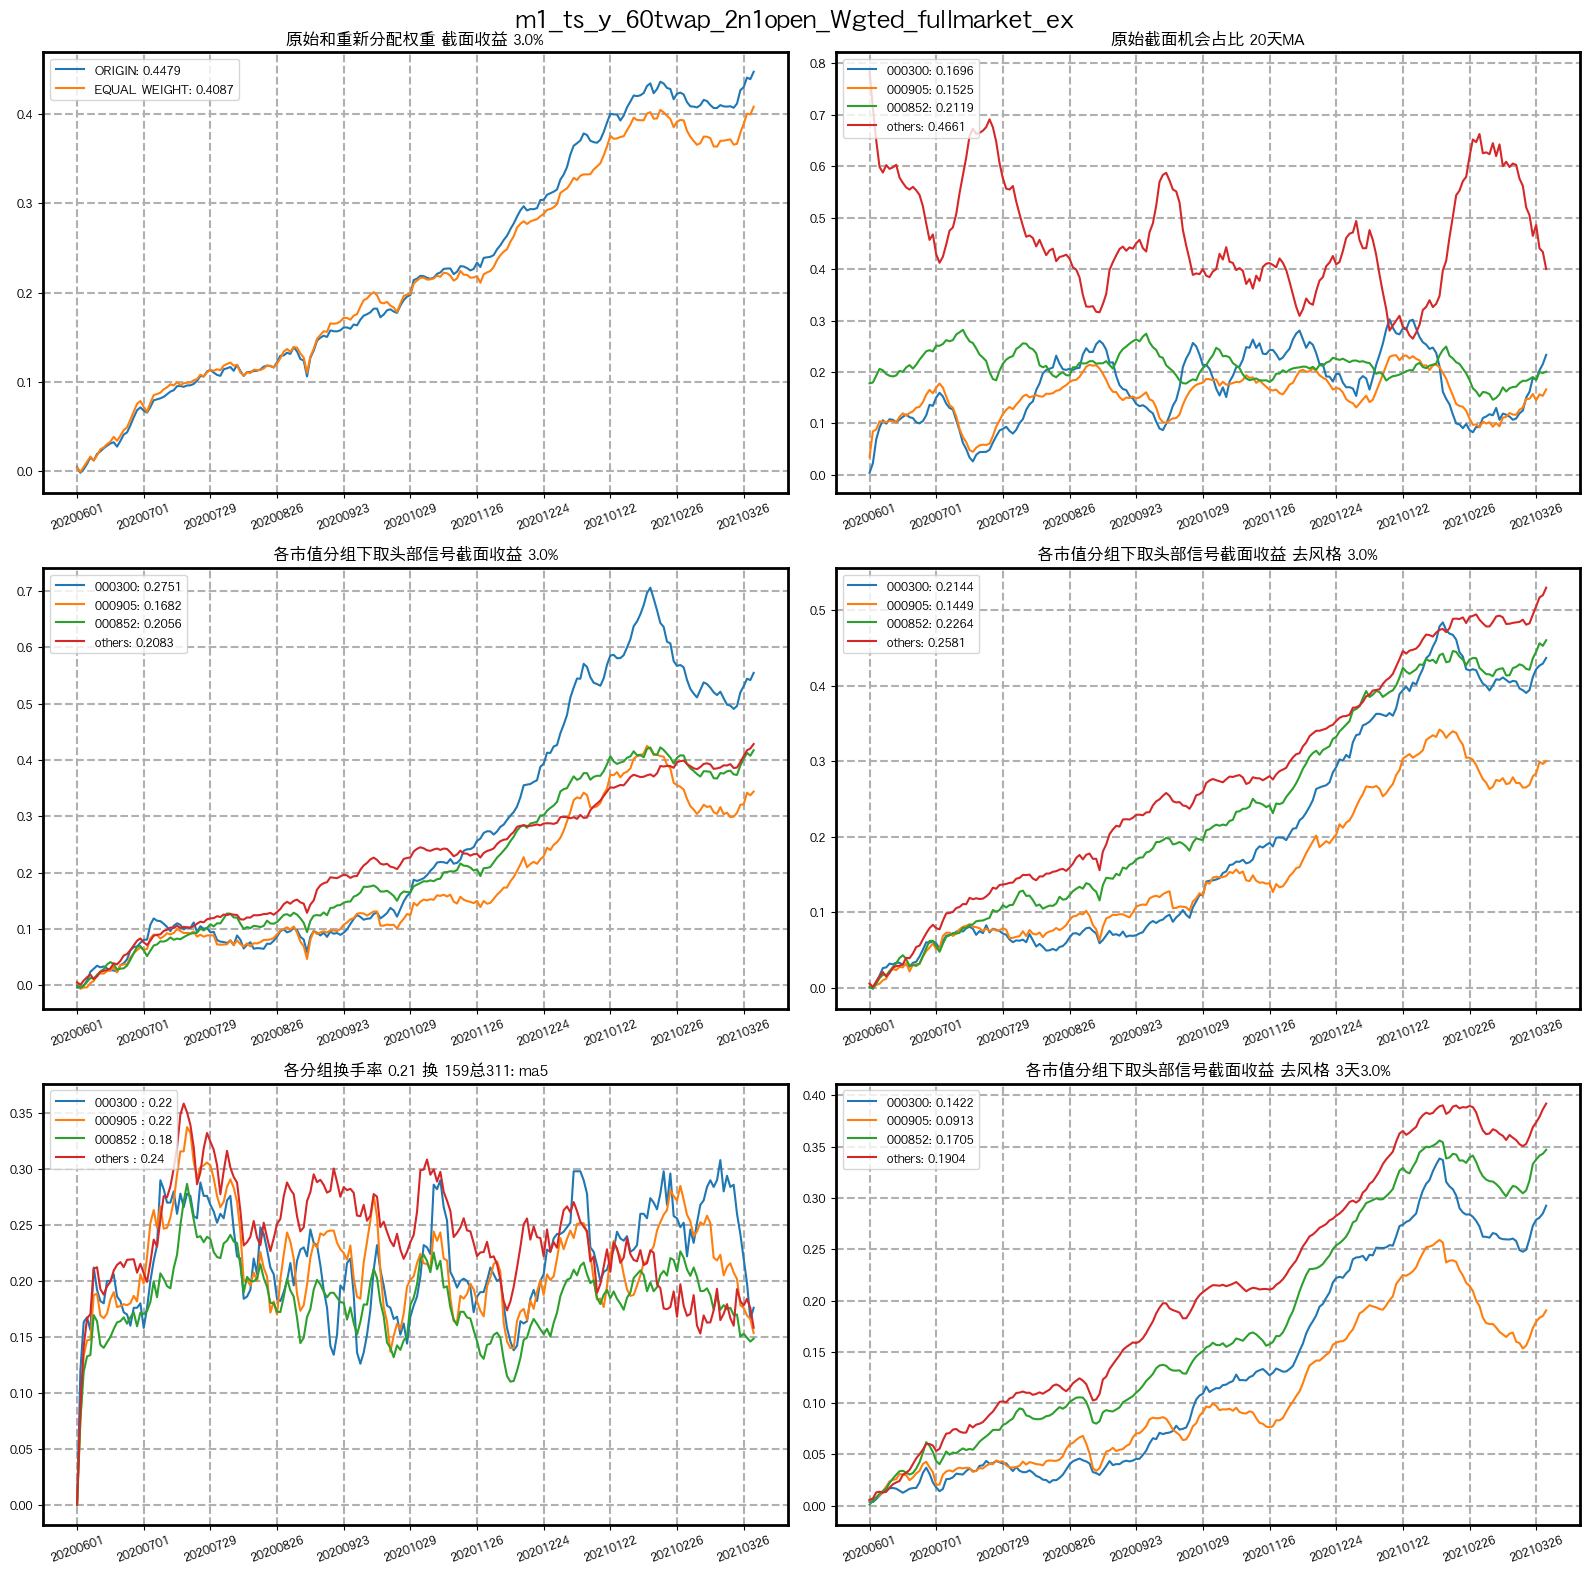

{'rtn_origin': 0.4478559,
 'origin_sharpe': 6.842974119247318,
 'rtn_000300_1d': 0.2144145779311657,
 'rtn_000300_3d': 0.142223690636456,
 'rtn_000905_1d': 0.14486688887700438,
 'rtn_000905_3d': 0.09131510742008686,
 'rtn_000852_1d': 0.22638747468590736,
 'rtn_000852_3d': 0.17050058813765645,
 'rtn_others_1d': 0.2580601489171386,
 'rtn_others_3d': 0.1904267119243741,
 'rtn_equalweight': 0.40866214,
 'turnover_ratio': 0.2142546598886469,
 'turnover_chgnum': 158.5484483175987,
 'turnover_tradenum': 310.62745098039215}

In [13]:
group_dict = {
    'crss_group_num':100, 
    'ts_group_num':1000, 
    'crss_ratio_thr':0.03, 
    'y_true':'m1_ts_y_60twap_2n1open_Wgted_fullmarket_ex',
    'group_num':4,
    'group_index':['000300','000905','000852','others'],
    'max_trade_times':[1,2,4,6],
    'pos_limit': [100, 120, 250, 270],
    'to_ratio':[0.2 ,0.3, 0.25, 0.25],
    'size_ratio':{}, # 指定各组机会占比,支持多组
}   
plot_sizepnl_groupby(res_df_all, group_dict)